#**Peer-graded Assignment**: Capstone Project - The Battle of Neighborhoods (Week 2)

# **Sharookh Ali**

#**REPORT**
###  **Table of Content**
<ol><li>Introduction
<li> Data Extraction
<li> Methodology
<li> Obsrvation & Discussion
<li> Conclusion

# **1.Introduction**: A description of the problem and a discussion of the background.

<ol><li>In Module 3, we explored New York City and the city of Toronto and segmented and clustered their neighborhoods. Both cities are very diverse and are the financial capitals of their respective countries. <li>One interesting idea would be to compare the neighborhoods of the two cities and determine how similar or dissimilar they are. 
<li> In this assignment we will compare the  neighborhoods of the two indian cities namely Hyderabad and Mumbai
<li>Is Hyderabad more like Mumbai in terms of Shops, Restaurants , Cafes etc? 
<li>In Hyderabad or Mumbai, if someone is looking to open a restaurant, where would we recommend that they open it? Similarly, if a contractor is trying to start their own business, where would you recommend that they setup their office? and other important points will be discussed
<li>If a person wants to shift from Hyderabad to Mumbai or vice versa, then how likely he will be adjusted to these cities will be discussed.

# **2.Data Extraction:**Extracting the data of HYDERABAD & MUMBAI

The data extracted may include:
<ol><li>List of Cafes and foodstalls of Hyderabad with their lattitude and longitude 
<li>List of Hotels, Book stores,Restaurant, Bakaries, and all relavant locations
<li> All data is limited with in 10km radius 

#**3. Methodology**
<ol><li>First extarcting the geograpical coordinates of Hyderabad & Mumbai through geolocator is to be done.
<li>Then FOURSQUARE credentials are specified forthe analysis of maps.
<li>Then the data is gathered with FOURSQURE API url with a limit of 10 kms radius and maximum count of 200 in both Mumbai and Hyderabad
<li> After the data is gathered, the venues are sorted according to thier categories and printed by including both lattitude and longitude.
<li> Then the maps of  Mumbai and Hyderabad are represented with the help of Folium.
<li> Then the value count of with respect to each category is done and printed for both Hyderabad anD Mumbai individually
<li> The corresponding value counts are represented as bar graphs and the observations, intutions are futher discussed in "OBSERVATION & DISCUSSION" section.

In [ ]:
import json 
import requests 
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize 
import numpy as np 
import time
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from geopy.geocoders import Nominatim 
import folium 
print('Libraries imported.')

Libraries imported.


## Extracting the geograpical coordinates of Hyderabad through geolocator

In [ ]:
address = 'Hyderabad'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of' ,address,'are {}, {}.'.format(latitude, longitude))
neighborhood_latitude=latitude
neighborhood_longitude=longitude

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinates of Hyderabad are 17.360589, 78.4740613.


In [ ]:
CLIENT_ID = '4PDNWKYQ3G5K3PEKC00MO2CUQWZGZJRTW1BTP5RE1M42VX2I' 
CLIENT_SECRET = '1OL5BDNLNVT0YCQGDKZC5GBUDK5PVMREH4G4PIUAZPDLT0DW' 
VERSION = '20180604' 

In [ ]:
radius = 10000
limit = 200 
# importing the data with URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    limit)
results = requests.get(url).json()

## Determining the catogories of each location in data


In [ ]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

## Showing the list of venues

In [ ]:
venues = results['response']['groups'][0]['items']
borough = results['response']['groups'][0]['items']     
HYD_venues = json_normalize(venues) # flatten JSON
HYD_borough= json_normalize(borough) 

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
HYD_venues =HYD_venues.loc[:, filtered_columns]
# filter the category for each row
HYD_venues['venue.categories'] = HYD_venues.apply(get_category_type, axis=1)
# clean columns
HYD_venues.columns = [col.split(".")[-1] for col in HYD_venues.columns]
HYD_venues.head(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,name,categories,lat,lng
0,Chowmahala Palace,History Museum,17.359300,78.471617
1,Shadaab,Diner,17.368661,78.475572
2,Hotel Shah Ghouse,Snack Place,17.347899,78.470986
3,Taj Falaknuma Palace,Resort,17.330118,78.467460
4,Charminar,Monument / Landmark,17.361555,78.474677
5,Pragati,South Indian Restaurant,17.388088,78.481134
6,Govind Ki Idly,South Indian Restaurant,17.364132,78.473771
7,Laxman Ki Bandi,South Indian Restaurant,17.378895,78.463973
8,Mayur Pan Shop,Juice Bar,17.388894,78.480578
9,Santosh Dhaba,Indian Restaurant,17.388485,78.479509


## Creating Hyderabad map with Folium

In [ ]:
MAP_HYD = folium.Map(location=[latitude, longitude], zoom_start=12)
# add markers to map
for lat, lng, label in zip(HYD_venues['lat'], HYD_venues['lng'], HYD_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill_color='#3186cc',
        fill_opacity=0.7,
    ).add_to(MAP_HYD)  
MAP_HYD

In [ ]:
from folium import plugins
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
print('Additional libraries imported.')

Additional libraries imported.


# Extracting the data of Mumbai

In this case also the data extracted may include:
<ol><li>List of Cafes and foodstalls of Mumbai with their lattitude and longitude 
<li>List of Hotels, Book stores,Restaurant, Bakaries, and all relavant locations
<li> All data is limited with in 10km radius

In [ ]:
address = 'Mumbai'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of' ,address,'are {}, {}.'.format(latitude, longitude))
neighborhood_latitude=latitude
neighborhood_longitude=longitude

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinates of Mumbai are 19.0759899, 72.8773928.


In [ ]:
radius = 20000
limit = 200 
# importing the data with URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    limit)
results = requests.get(url).json()

## Determining the catogories of each location in data & Showing the list of venues

In [ ]:
venues = results['response']['groups'][0]['items']
    
MB_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
MB_venues =MB_venues.loc[:, filtered_columns]
# filter the category for each row
MB_venues['venue.categories'] = MB_venues.apply(get_category_type, axis=1)
# clean columns
MB_venues.columns = [col.split(".")[-1] for col in MB_venues.columns]
MB_venues.head(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Sofitel Mumbai BKC,Hotel,19.067448,72.869006
1,Starbucks Coffee Capital,Coffee Shop,19.063457,72.861576
2,Hamleys,Toy / Game Store,19.086655,72.889783
3,Trident,Hotel,19.066808,72.867468
4,Grand Hyatt,Hotel,19.076832,72.851270
5,Peshawari,Indian Restaurant,19.103954,72.869879
6,JW Marriott Mumbai Sahar,Hotel,19.102502,72.878236
7,Guru Kripa,Indian Restaurant,19.042955,72.861796
8,ITC Maratha,Hotel,19.104023,72.869638
9,Natural Ice Cream,Dessert Shop,19.052643,72.899760


## Creating Mumbai map with Folium

In [ ]:
MAP_MB = folium.Map(location=[latitude, longitude], zoom_start=12)
# add markers to map
for lat, lng, label in zip(MB_venues['lat'], MB_venues['lng'], MB_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill_color='#3186cc',
        fill_opacity=0.7,
    ).add_to(MAP_MB)  
MAP_MB

## Value count of HYDERABAD

In [ ]:
HYD_count = HYD_venues['categories'].value_counts()
MB_count = MB_venues['categories'].value_counts()
print(">>>>>>HYDERABAD<<<<<<")
print(HYD_count)

>>>>>>HYDERABAD<<<<<<
Indian Restaurant                11
Bakery                            8
Hotel                             7
Multiplex                         4
South Indian Restaurant           4
History Museum                    3
Diner                             3
Café                              3
Chinese Restaurant                3
Ice Cream Shop                    3
Chaat Place                       2
Asian Restaurant                  2
Snack Place                       2
Shopping Mall                     2
Nightclub                         2
Restaurant                        2
Fast Food Restaurant              2
Juice Bar                         2
Historic Site                     2
Coffee Shop                       2
Smoke Shop                        1
American Restaurant               1
Food Truck                        1
Steakhouse                        1
Hookah Bar                        1
Performing Arts Venue             1
Andhra Restaurant                 1
Golf C

## Value count of MUMBAI

In [ ]:
print("")
print(">>>>>>MUMBAI<<<<<<")
print(MB_count)


>>>>>>MUMBAI<<<<<<
Indian Restaurant                13
Hotel                            12
Coffee Shop                       7
Scenic Lookout                    4
Café                              4
Bakery                            3
Seafood Restaurant                3
Dessert Shop                      3
Lounge                            3
Deli / Bodega                     2
Fast Food Restaurant              2
Shopping Mall                     2
Juice Bar                         2
Asian Restaurant                  2
Chinese Restaurant                2
South Indian Restaurant           2
Ice Cream Shop                    2
Sculpture Garden                  1
Multiplex                         1
Toy / Game Store                  1
Garden                            1
Punjabi Restaurant                1
Park                              1
Sandwich Place                    1
Pub                               1
Playground                        1
Theme Park                        1
Theater 

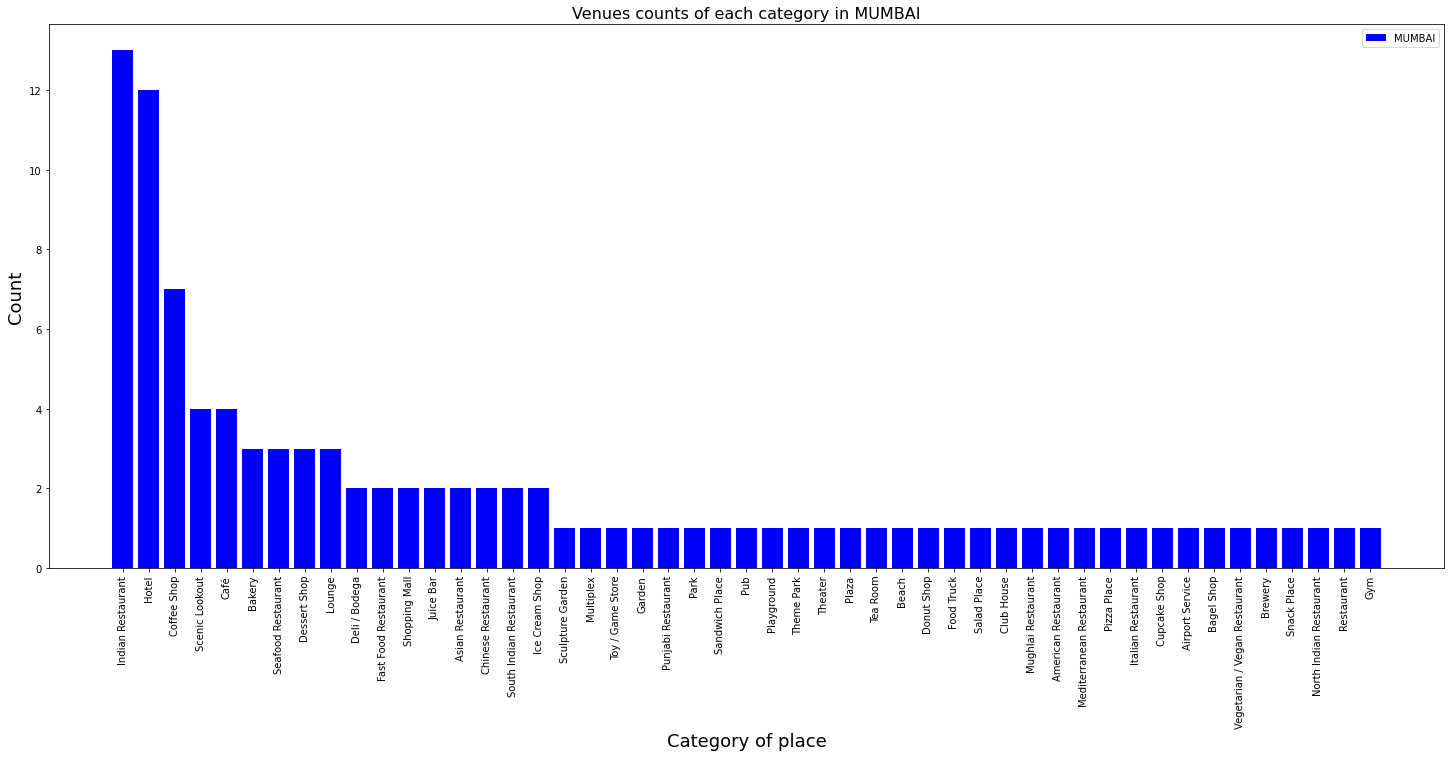

In [ ]:
MB_count = MB_venues['categories'].value_counts()
plt.figure(figsize = (25, 10))
plt.xticks(rotation = 90)
plt.xlabel("Category of place", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.title("Venues counts of each category in MUMBAI", fontsize = 16)
plt.bar(MB_count.index, MB_count.values,color='blue')
plt.legend(["MUMBAI"])

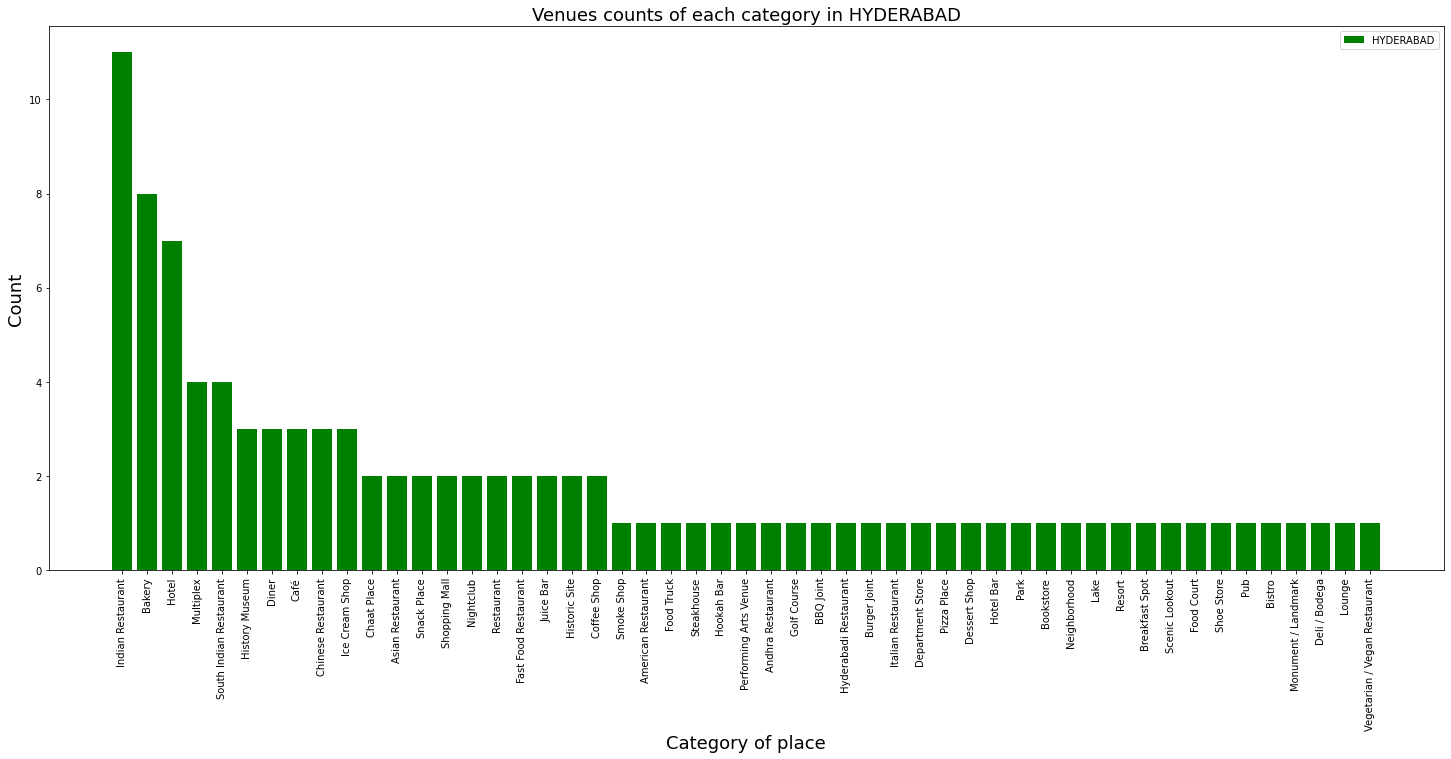

In [ ]:
plt.figure(figsize = (25, 10))
plt.xticks(rotation = 90)
plt.xlabel("Category of place", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.title("Venues counts of each category in HYDERABAD", fontsize = 18)
plt.bar(HYD_count.index, HYD_count.values, color='green')
plt.legend(["HYDERABAD"])

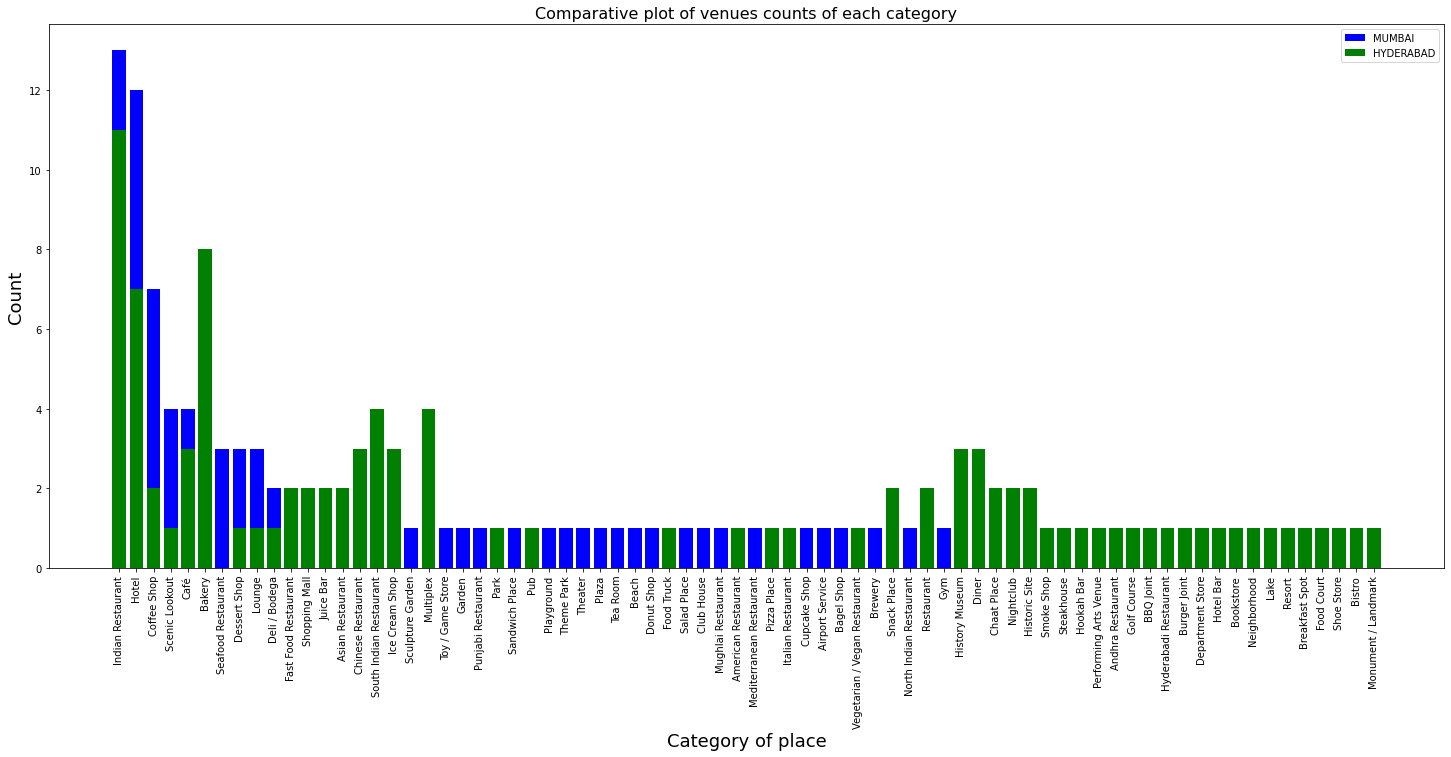

In [ ]:
plt.figure(figsize = (25, 10))
plt.xticks(rotation = 90)
plt.xlabel("Category of place", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.title("Comparative plot of venues counts of each category", fontsize = 16)
plt.bar(MB_count.index, MB_count.values,color='blue')
plt.bar(HYD_count.index, HYD_count.values, color='green')
plt.legend(["MUMBAI","HYDERABAD"])

#**4.Observations & Discussion**

<ol><li>From above bar graph, we can observe that bothe HYDERABAD and MUMBAI are similar in tersm of Shops, Restaurants , Cafes etc.
<li>However, the Mumbai is more versatile in terms of venues compare to Hyderabad. 
<li> In Mumbai,when we observe the Folium map created with the help of Foursquare credentials, more venues are clustered in "Bandra West & Juhu" area and less venues can be spotted in " Vidya Vihar " area.
<li>In Hyderabad,up on similar observation, more venues are clustered in "Abids, Ameetpet & Panjagutta" area and less venues can be spotted in " Golkonda " area.
<li>Mumbai has significantly more number of Indian restaurants, Hotels, Coffe shops, lounges.
<li>On other hand, Hyderabad has more number of Bakeries tha Mumbai
<li> In terms of Shopping malls, Chinese restaurants, Asian restaurants, Ice cream shops, Juice bar both Mumbai and Hyderabad are more similar.
<li>Rest miscellaneous venues are found to be single or two for both Mumbaib and Hyderabad. 

#**5.Conclusion**

<ol><li> From above observations we can conclude the following things:
<li>In Mumbai, if some one wants to open a restautant, one can prefer "Bandra West or Juhu" area similarly in Hyderabad one can prefer "Abids or Ameerpet" area.
<li> Opening Indian restaurant or Hotel in Hyderabad will be comparatively better than Mumbai because Mumbai already has a significantly more number of this category venues than Hyderabad.
<li> One can always preferr starting up a miscellenius type of venues as they were low and easy entry to the market in both Mumbai and Hyderabad
<li> On overall, if a person wants to shift from Hyderabad to Mumbai or vice versa  , there wouldn't be any problems as both cities are more similar in terms of venues  according to Foursquare API data.

## **Ending Remarks**
Coursera has given a very good opportunity to learn Data science. Thanks to Coursera, IBM  and Peers.\
**Happy learning!**